<div align="center">


</div>

<h1 align="center">Portuguese Bank Marketing Analysis</h1>

<div align="center">

---

</div>


### 1:Data Loading and Exploration

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder , LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [38]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/GangasrinivasKatraji/Predictive-Analysis-and-Strategic-Insights-for-Portuguese-Bank-Marketing-Campaigns/main/Dataset/bank-additional-full.csv')


In [39]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [40]:
# Display the first five rows of the dataframe
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [41]:
# Checking the info of the model
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [42]:
# Summary statistics
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [43]:
# Check for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [44]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### 2: Data Preprocessing

In [46]:
# Dropping rows with missing values
df = df.dropna()

# Encoding categorical variables
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
label_encoders = {}
for column in categorical_vars:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Encoding the target variable
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Splitting the data into training and testing sets
X = df.drop(columns=['y'])
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### 3: Exploratory Data Analysis (EDA)

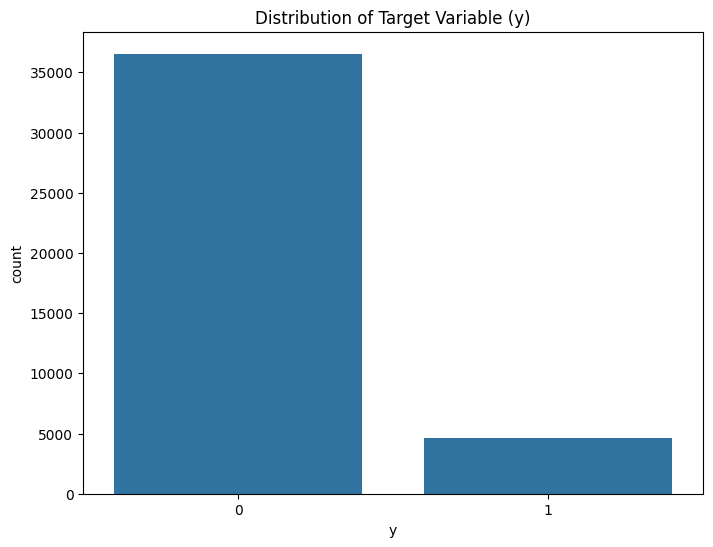

In [47]:
# Target variable analysis
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='y')
plt.title('Distribution of Target Variable (y)')
plt.show()

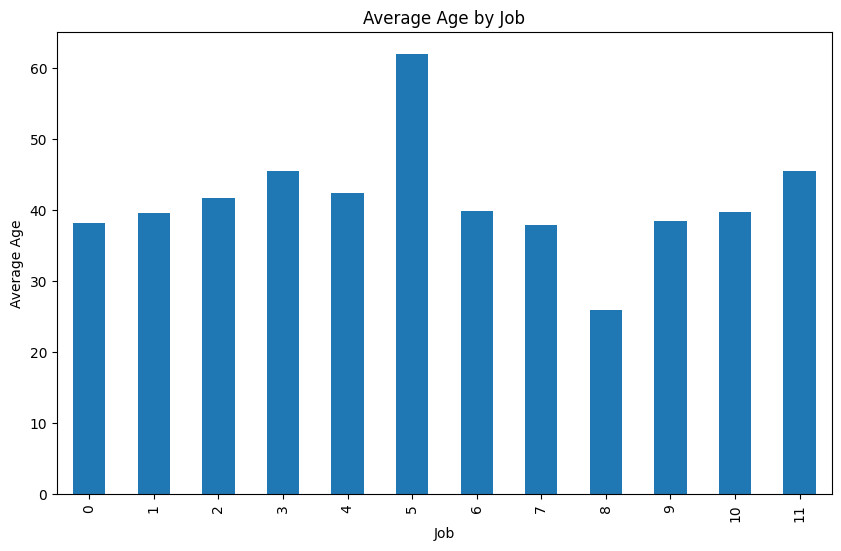

In [48]:
# Calculate average age for each job
average_age_by_job = df.groupby('job')['age'].mean()

# Create a bar chart to visualize the differences
plt.figure(figsize=(10, 6))  # Make the chart bigger
average_age_by_job.plot(kind='bar')
plt.title('Average Age by Job')
plt.xlabel('Job')
plt.ylabel('Average Age')
plt.show()  # Display the chart

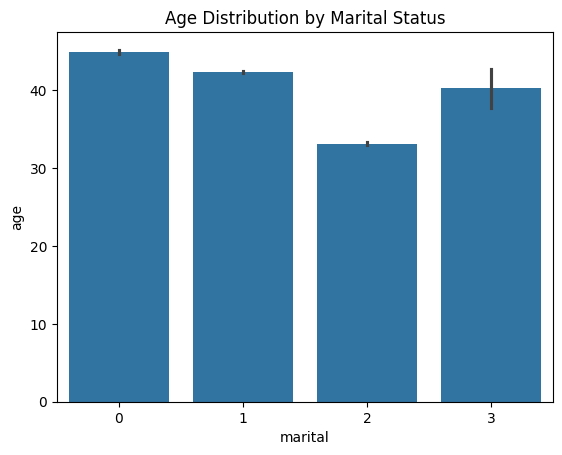

In [49]:
# Distribution Comparison (Box Plot)
sns.barplot(x='marital', y='age', data=df)
plt.title('Age Distribution by Marital Status')
plt.show()

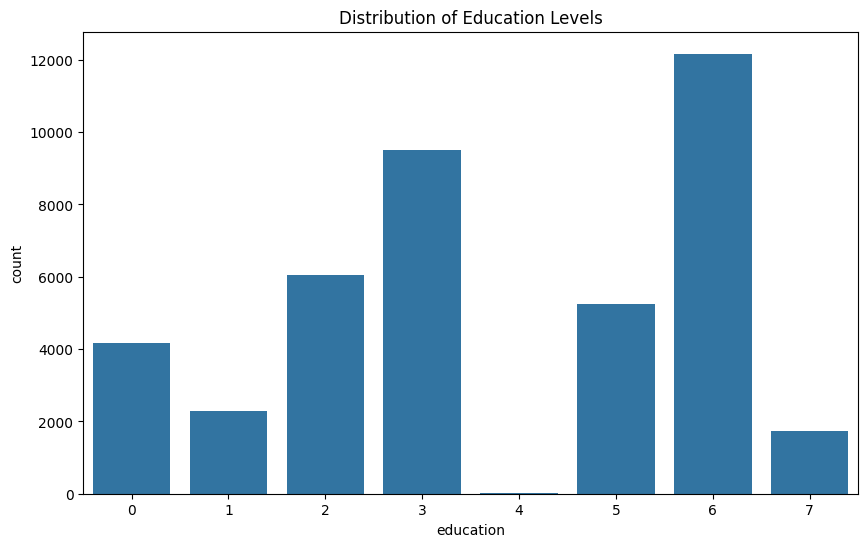

In [50]:
# Bar Chart (Categorical)
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=df)
plt.title('Distribution of Education Levels')
plt.show()

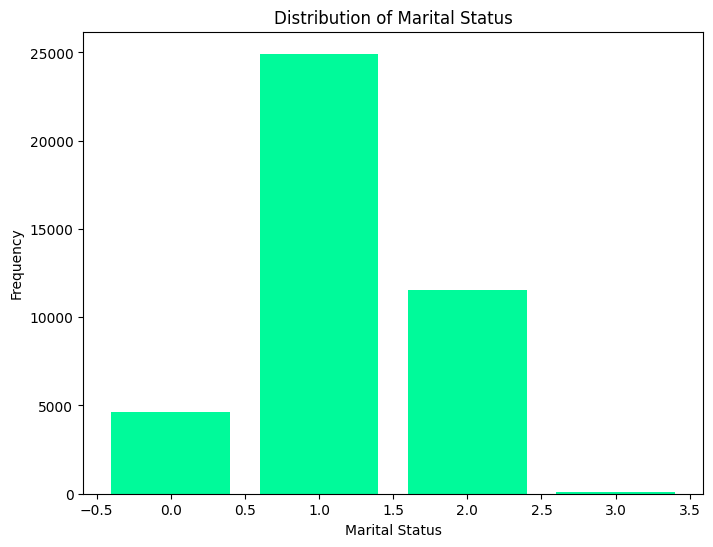

In [51]:
# Calculating value counts for the 'marital' column
marital_counts = df['marital'].value_counts()

# Plotting the distribution of the 'marital' column
plt.figure(figsize=(8, 6))

# Plot bar chart
plt.bar(marital_counts.index, marital_counts.values, color='mediumspringgreen')

# Set x-axis label
plt.xlabel('Marital Status')

# Set y-axis label
plt.ylabel('Frequency')

# Set title
plt.title('Distribution of Marital Status')

# Show the plot
plt.show()

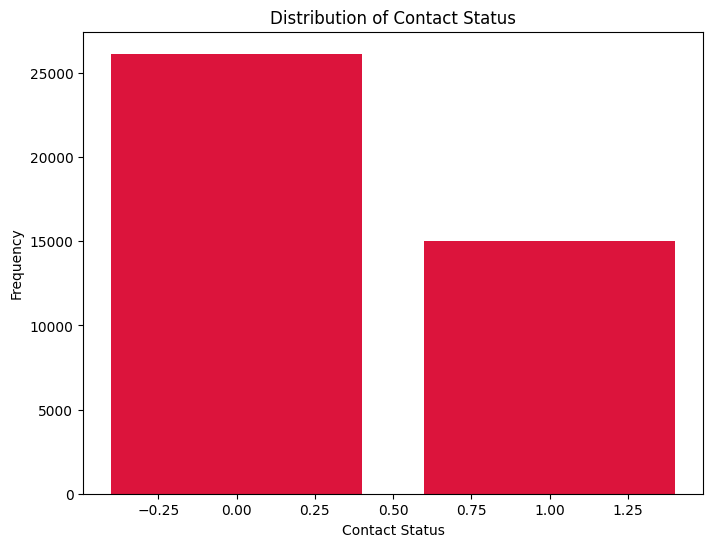

In [52]:
# Ensure the 'contact' column is defined and contains data
contact = df['contact'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))

# Plot bar chart
plt.bar(contact.index, contact.values, color='crimson')

# Set x-axis label
plt.xlabel('Contact Status')

# Set y-axis label
plt.ylabel('Frequency')

# Set title
plt.title('Distribution of Contact Status')

# Show the plot
plt.show()


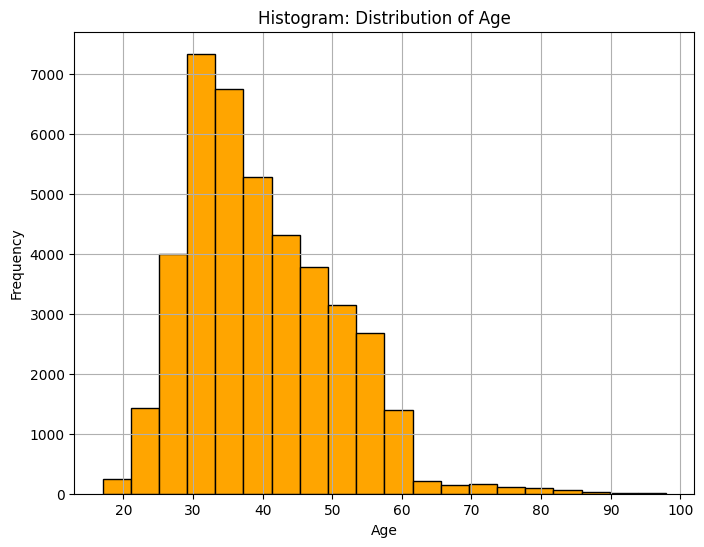

In [53]:
# Histogram

# Create a new figure with size 8x6 inches

plt.figure(figsize=(8, 6))  

# Plot histogram with 20 bins

plt.hist(df['age'], bins=20, color='orange', edgecolor='black')  

# Set x-axis label

plt.xlabel('Age')  

# Set y-axis label

plt.ylabel('Frequency')  

# Set title of the plot

plt.title('Histogram: Distribution of Age')  

# Add gridlines

plt.grid(True)  

# Display the plot
plt.show()  

C:\Users\carrefour\AppData\Local\Temp\ipykernel_16256\3392068898.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='education', y='age', data=average_age, palette='Set2')


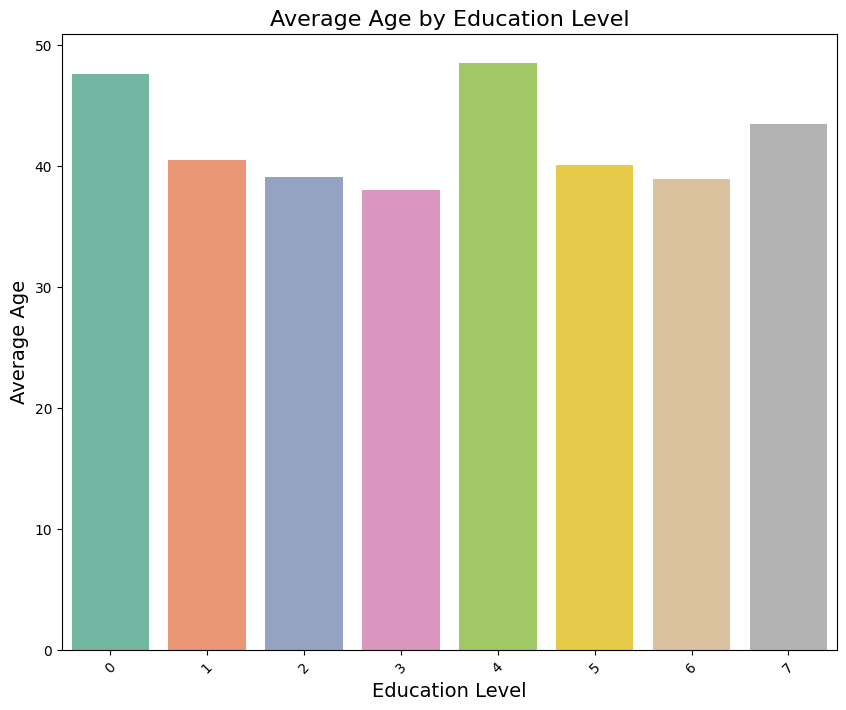

In [54]:
# Calculating the average age for each education level
average_age = df.groupby('education')['age'].mean().reset_index()

# Plotting the average age by education level
plt.figure(figsize=(10, 8))

# Create a bar plot
sns.barplot(x='education', y='age', data=average_age, palette='Set2')

# Set x-axis label
plt.xlabel('Education Level', fontsize=14)

# Set y-axis label
plt.ylabel('Average Age', fontsize=14)

# Set title of the plot
plt.title('Average Age by Education Level', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

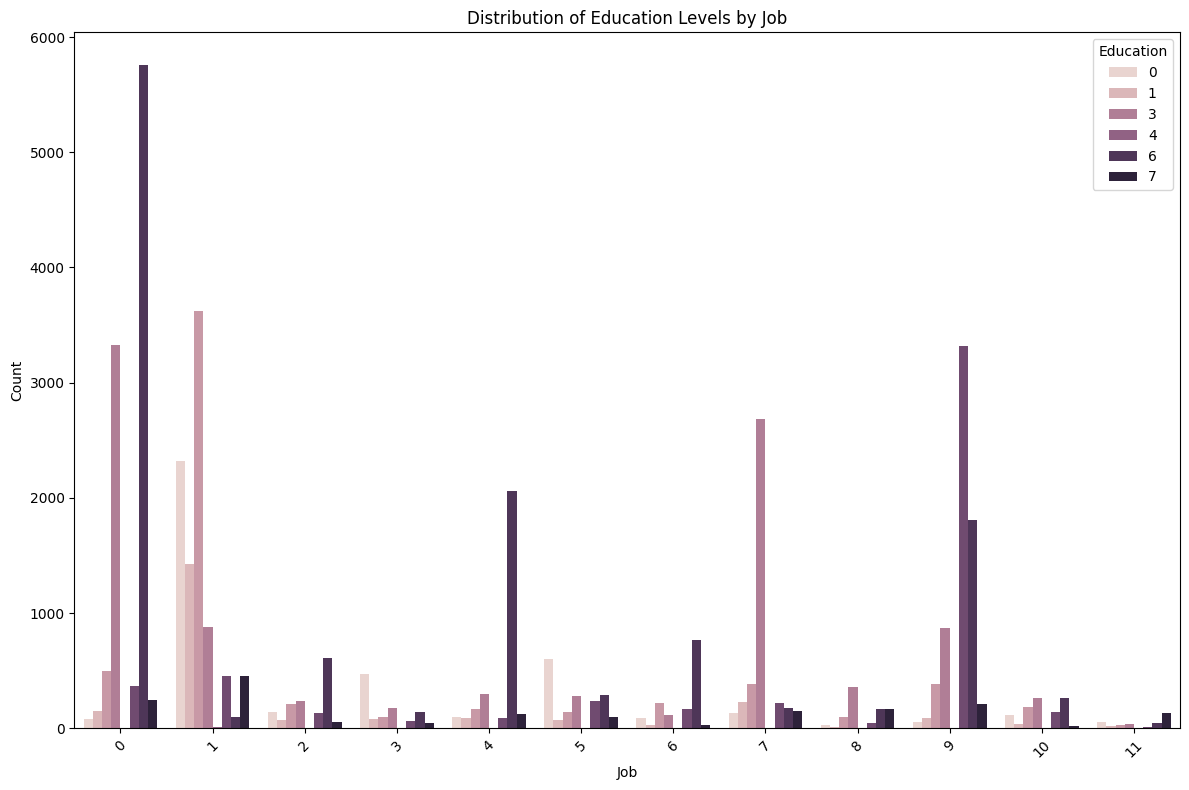

In [55]:
# Bar Chart of Education Levels by Job Category
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='job', hue='education')
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Distribution of Education Levels by Job')
plt.xticks(rotation=45)
plt.legend(title='Education')
plt.tight_layout()
plt.show()

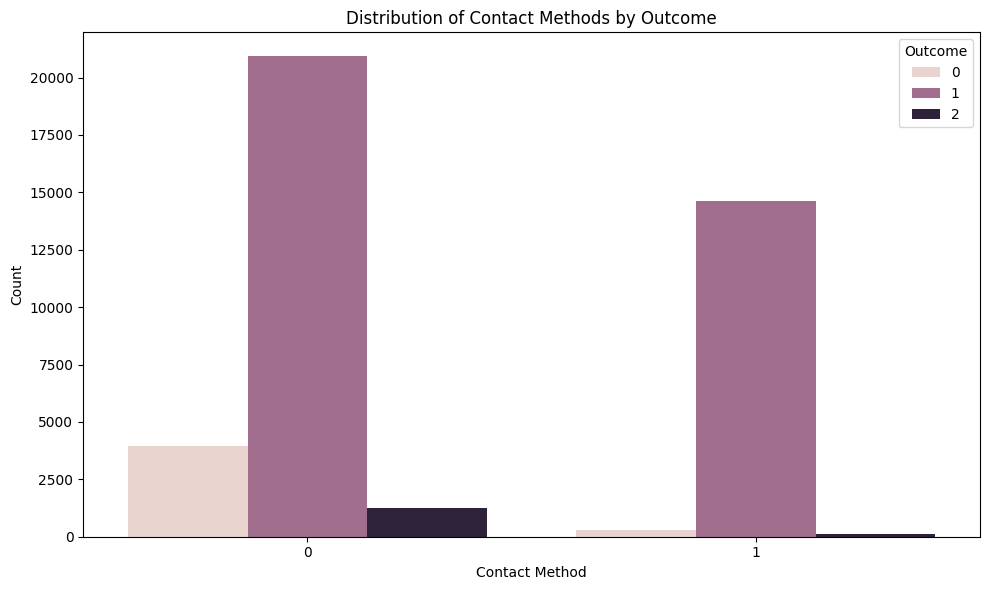

In [56]:
# Count Plot of Contact Method by Outcome
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='contact', hue='poutcome')
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.title('Distribution of Contact Methods by Outcome')
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()

### 4: Model Building

In [57]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [58]:
# Decision Tree Classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [59]:
# Random Forest Classifier
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [61]:
# Support Vector Machine Classifier
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

### 5: Model Evaluation

In [62]:
# Logistic Regression Evaluation
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression")
print(classification_report(y_test, y_pred_log_reg))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.42      0.51       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238

ROC AUC Score: 0.6957402312872668
Confusion Matrix:
[[7108  195]
 [ 544  391]]


In [63]:
# Decision Tree Classifier Evaluation
y_pred_tree_clf = tree_clf.predict(X_test)
print("\nDecision Tree Classifier")
print(classification_report(y_test, y_pred_tree_clf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_tree_clf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree_clf))


Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7303
           1       0.50      0.51      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.72      0.72      8238
weighted avg       0.89      0.89      0.89      8238

ROC AUC Score: 0.72229843277358
Confusion Matrix:
[[6832  471]
 [ 459  476]]


In [64]:
# Random Forest Classifier Evaluation
y_pred_forest_clf = forest_clf.predict(X_test)
print("\nRandom Forest Classifier")
print(classification_report(y_test, y_pred_forest_clf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_forest_clf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_forest_clf))


Random Forest Classifier
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.65      0.51      0.57       935

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238

ROC AUC Score: 0.7374162401943088
Confusion Matrix:
[[7045  258]
 [ 458  477]]


In [65]:
# Gradient Boosting Classifier Evaluation
y_pred_gb_clf = gb_clf.predict(X_test)
print("\nGradient Boosting Classifier")
print(classification_report(y_test, y_pred_gb_clf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_gb_clf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb_clf))


Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7303
           1       0.69      0.52      0.60       935

    accuracy                           0.92      8238
   macro avg       0.82      0.75      0.78      8238
weighted avg       0.91      0.92      0.91      8238

ROC AUC Score: 0.7472436424559243
Confusion Matrix:
[[7087  216]
 [ 445  490]]


In [66]:
# Support Vector Machine Classifier
y_pred_svm_clf = svm_clf.predict(X_test)
print("\nSupport Vector Machine")
print(classification_report(y_test, y_pred_svm_clf))
print("ROC AUC SCORE:", roc_auc_score(y_test, y_pred_svm_clf))
print("confusion_matrix")
print(confusion_matrix(y_test, y_pred_svm_clf))


Support Vector Machine
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.40      0.50       935

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238

ROC AUC SCORE: 0.687868731698423
confusion_matrix
[[7118  185]
 [ 560  375]]


#### Performance Summary Table

| Model                    | Precision (Class 0) | Precision (Class 1) | Recall (Class 0) | Recall (Class 1) | F1-Score (Class 0) | F1-Score (Class 1) | ROC AUC |
| ------------------------ | -------------------- | -------------------- | ---------------- | ---------------- | ------------------ | ------------------ | ------- |
| Logistic Regression      | 0.93                 | 0.67                 | 0.97             | 0.42             | 0.95               | 0.51               | 0.696   |
| Decision Tree Classifier | 0.94                 | 0.50                 | 0.94             | 0.51             | 0.94               | 0.51               | 0.722   |
| Random Forest Classifier | 0.94                 | 0.65                 | 0.96             | 0.51             | 0.95               | 0.57               | 0.737   |
| Gradient Boosting        | 0.94                 | 0.69                 | 0.97             | 0.52             | 0.96               | 0.60               | 0.747   |
| Support Vector Machine   | 0.93                 | 0.67                 | 0.97             | 0.40             | 0.95               | 0.50               | 0.688   |


##### Analysis and Recommendation
Based on the performance summary table:

- Precision for Class 1: Among all models evaluated, the **Gradient Boosting Classifier** stands out with the highest precision score of 0.69 for class 1. This indicates its superior ability to accurately identify customers who are likely to subscribe to term deposits.

- Precision for Class 0: All models consistently maintain high precision scores above 0.93 for class 0, demonstrating their reliability in correctly predicting customers who are unlikely to subscribe.

- Overall Performance: The **Gradient Boosting Classifier** not only achieves the highest precision for class 1 but also shows competitive performance across recall, F1-score, and ROC AUC metrics. This comprehensive performance underscores its effectiveness in distinguishing potential subscribers from non-subscribers.

##### Recommendation
- The **Gradient Boosting Classifier** is recommended for predicting term deposit subscriptions due to its superior precision in identifying potential subscribers and overall strong performance across key metrics. Deploying this model can enhance campaign effectiveness by accurately targeting customers likely to subscribe.

<div align="center">

---

</div>

<h1 align="center">Thank You!</h1>

<div align="center">

---

</div>
